## Análise das vendas de produtos no Wish - Solução

Você foi contratado por uma empresa que planeja revender produtos no Wish. Seu objetivo vai ser ajudá-los a entender que fatores são os mais importantes para definir o sucesso de determinados produtos dentro da plataforma. Utilize as ferramentas estudadas até aqui para tirar insights e auxiliar a empresa do ponto de vista estratégico.

https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### Perguntas possíveis

- Produtos com maior discrepância entre preço real e de retail vendem mais?
- Ad boost aumentam as vendas?
- Avaliações melhores aumentam vendas?
- Badges importam?
- Quantidade de tags auxiliam vendas?
- Tags com maiores vendas?
- Tempo de existência do produto
- Shipping analysis
- Todos os produtos contém fotos?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_products = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

In [4]:
df_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [12]:
cols = ['title', # titulo do produto
 'price', # preço do produto
 'retail_price', # preço vendido
 'currency_buyer', # Moeda vendida
 'units_sold', # qtd vendida
 'uses_ad_boosts', # usou boosts para venda
 'rating', # avaliação do produto
 'rating_count', # qtd de avaliações
 'badges_count', # qtd de emblemas 
 'badge_product_quality', # possui emblema de qualidade
 'badge_fast_shipping', # possui emblema de rapidez de entrega
 'tags', # tags do produto
 'product_color', # cor do produto
 'product_variation_size_id', #  tamanho do produto
 'product_variation_inventory', # qtd disponivel 
 'shipping_is_express', # envio é expresso
 'countries_shipped_to', # qtd de paises que são vendidos
 'inventory_total', # qtd total disponivel
 'has_urgency_banner', # tem texto apelativo de urgencia
 'origin_country', # país de origem 
 'merchant_rating_count', # qtd de avaliação para o vendedor
 'merchant_rating',] # avaliação do vendedor

## 1. Análise da qualidade dos dados

### 1.1 - Manipulando e tratando dados

In [7]:
df_products = df_products[cols]


In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   currency_buyer               1573 non-null   object 
 4   units_sold                   1573 non-null   int64  
 5   uses_ad_boosts               1573 non-null   int64  
 6   rating                       1573 non-null   float64
 7   rating_count                 1573 non-null   int64  
 8   badges_count                 1573 non-null   int64  
 9   badge_product_quality        1573 non-null   int64  
 10  badge_fast_shipping          1573 non-null   int64  
 11  tags                         1573 non-null   object 
 12  product_color                1532 non-null   object 
 13  product_variation_

 * Preenchendo valores vazios com dados genericos ou complementares

In [10]:
df_products["product_color"].fillna('Generic', inplace=True)
df_products['product_variation_size_id'].fillna('All_size', inplace=True)
df_products['has_urgency_banner'].fillna(0, inplace=True)
df_products['origin_country'].fillna('CN', inplace=True)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   currency_buyer               1573 non-null   object 
 4   units_sold                   1573 non-null   int64  
 5   uses_ad_boosts               1573 non-null   int64  
 6   rating                       1573 non-null   float64
 7   rating_count                 1573 non-null   int64  
 8   badges_count                 1573 non-null   int64  
 9   badge_product_quality        1573 non-null   int64  
 10  badge_fast_shipping          1573 non-null   int64  
 11  tags                         1573 non-null   object 
 12  product_color                1573 non-null   object 
 13  product_variation_

In [11]:
df_products.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.074380,0.012715,33.081373,0.002543,40.456453,49.821360,0.300699,2.649583e+04,4.032345
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.262472,0.112075,21.353137,0.050379,20.301203,2.562799,0.458708,7.847446e+04,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.333333
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,6.000000,0.000000,31.000000,50.000000,0.000000,1.987000e+03,3.917353
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,50.000000,0.000000,40.000000,50.000000,0.000000,7.936000e+03,4.040650
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,50.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.161797
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,50.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000


In [13]:
df_products['rating_round'] = df_products['rating'].round(0)
df_products['merchant_rating_round'] = df_products['merchant_rating'].round(0)
df_products.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,rating_round,merchant_rating_round
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.074380,0.012715,33.081373,0.002543,40.456453,49.821360,0.300699,2.649583e+04,4.032345,3.827082,3.987921
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.262472,0.112075,21.353137,0.050379,20.301203,2.562799,0.458708,7.847446e+04,0.204768,0.553135,0.139908
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.333333,1.000000,2.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,6.000000,0.000000,31.000000,50.000000,0.000000,1.987000e+03,3.917353,4.000000,4.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,50.000000,0.000000,40.000000,50.000000,0.000000,7.936000e+03,4.040650,4.000000,4.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,50.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.161797,4.000000,4.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,50.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000,5.000000,5.000000


### 1.2 - Separando dados categóricos e numéricos

In [37]:
categorical_cols = [i for i in cols if i not in df_products.describe().columns]
numerical_cols = df_products.describe().columns
categorical_cols

['title',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

In [39]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating',
       'rating_round', 'merchant_rating_round'],
      dtype='object')

## 2. Análise exploratória dos dados

### 2.1 - Verificando qtd de rating e medalhas dos produtos

In [20]:
print(df_products['rating_round'].value_counts())
print(df_products['merchant_rating_round'].value_counts())
df_products['badges_count'].value_counts()

4.0    1126
3.0     325
5.0     100
2.0      19
1.0       3
Name: rating_round, dtype: int64
4.0    1545
3.0      22
5.0       5
2.0       1
Name: merchant_rating_round, dtype: int64


0    1422
1     138
2      11
3       2
Name: badges_count, dtype: int64

### 2.2 - Verificando se alguma coluna tem alguma correlação forte com outra

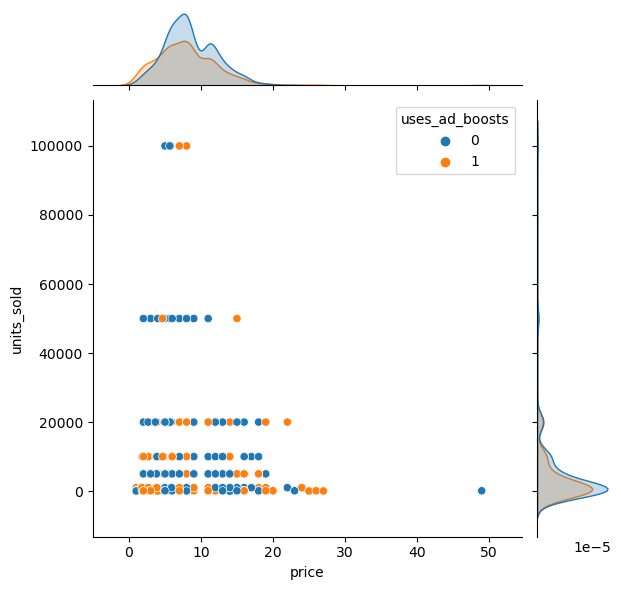

In [26]:
sns.jointplot(x='price', y="units_sold", hue='uses_ad_boosts', data=df_products)

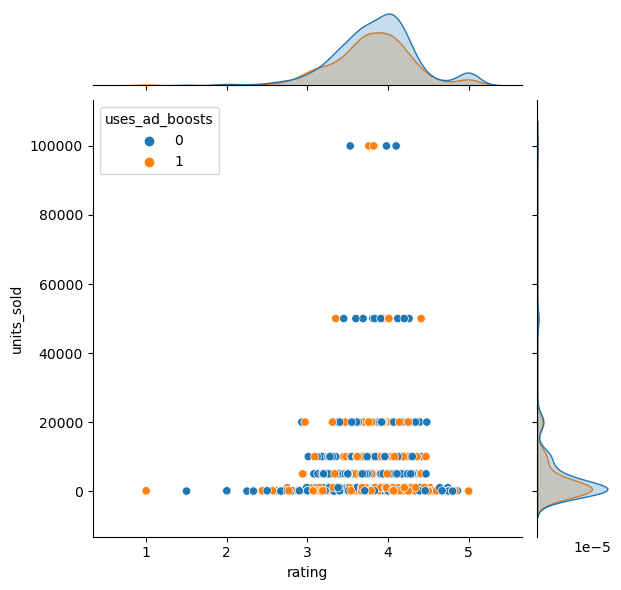

In [25]:
sns.jointplot(x='rating', y="units_sold", hue='uses_ad_boosts', data=df_products)

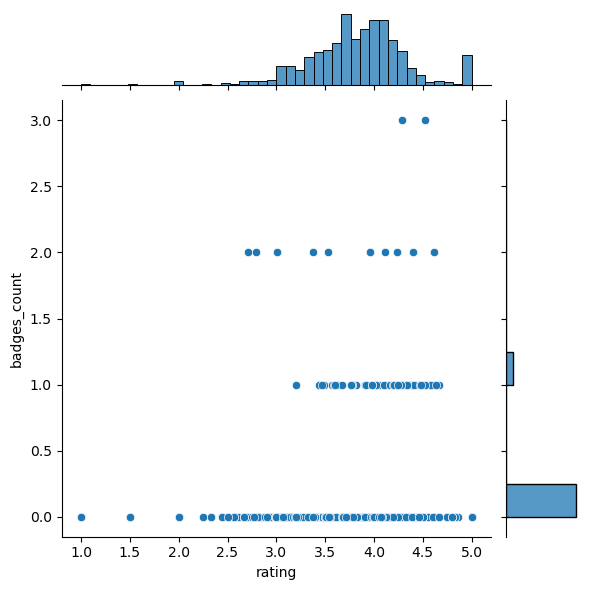

In [28]:
sns.jointplot(x='rating', y="badges_count", data=df_products)

### 2.3 - Visualizando dados não numéricos

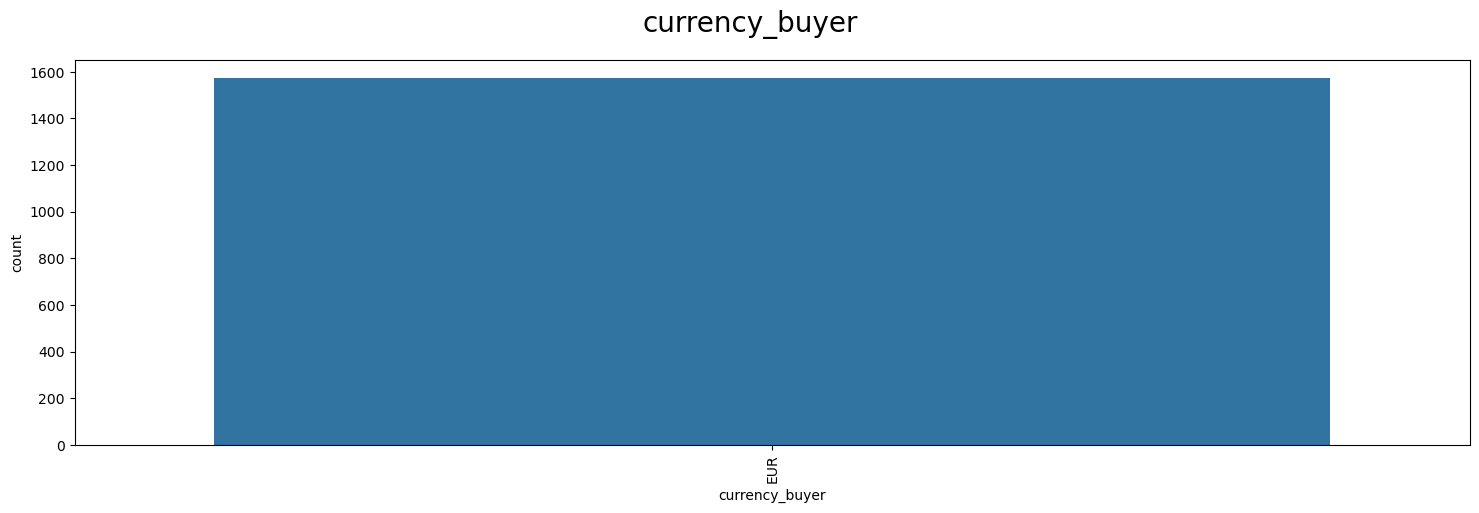

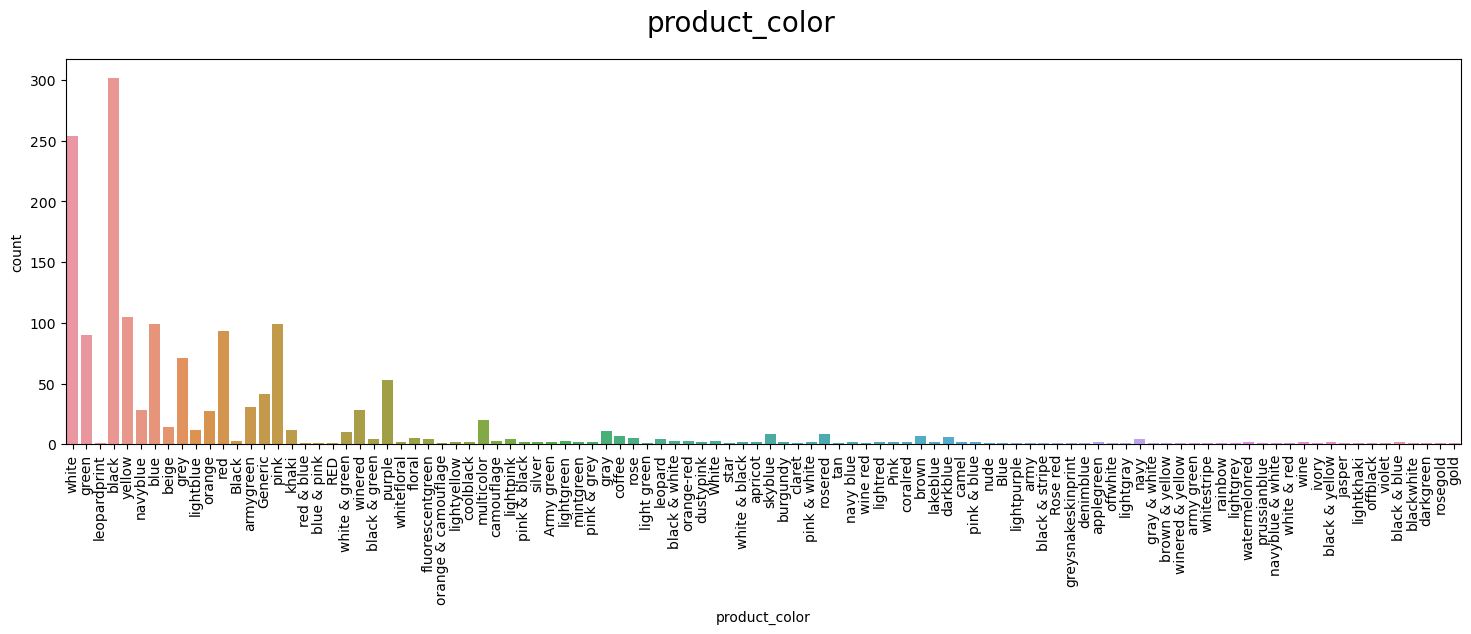

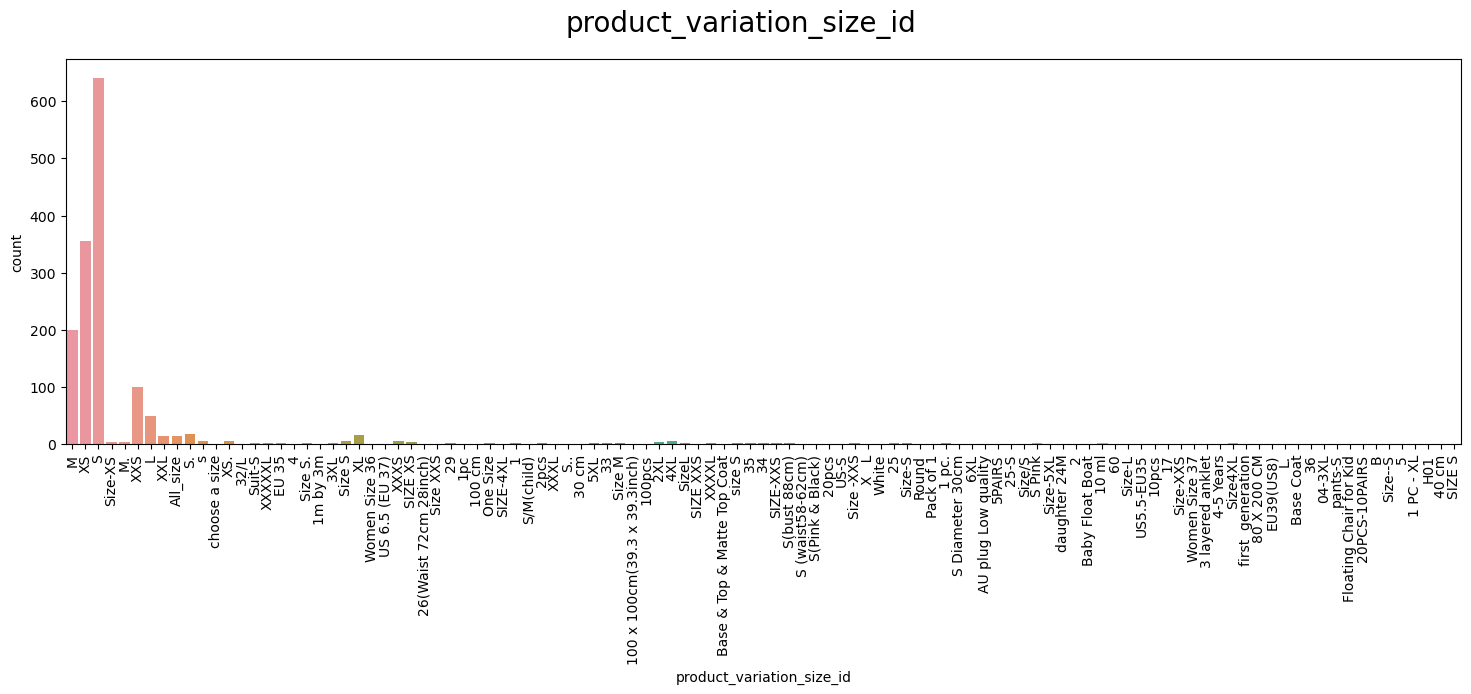

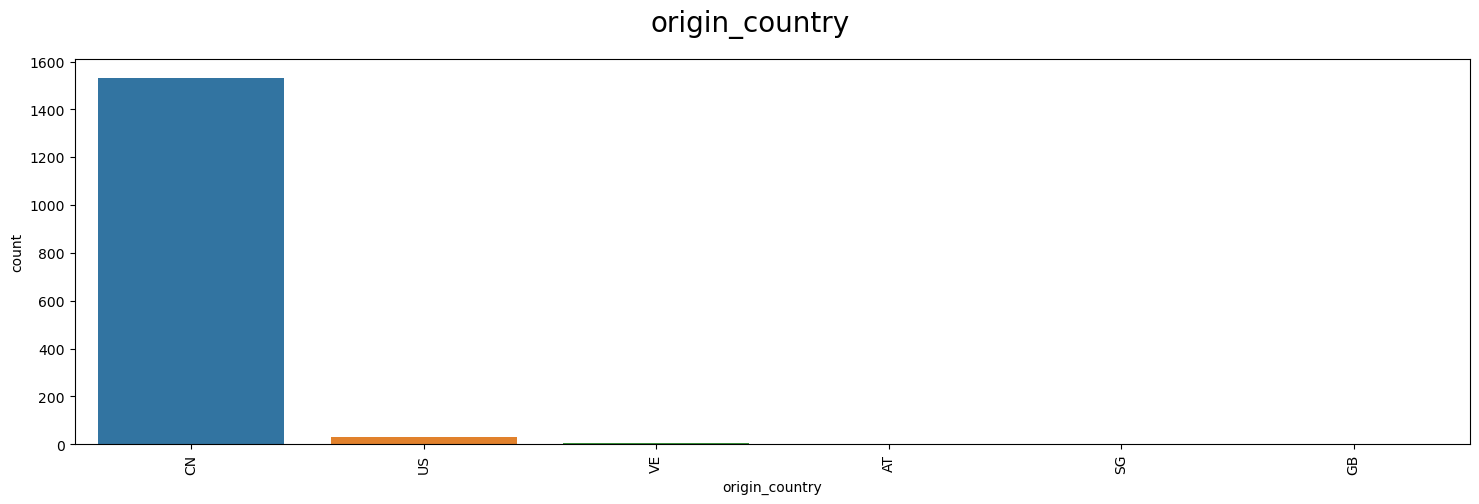

In [40]:
for col in categorical_cols:
    if col not in ["title", "tags"]:
        f, axes = plt.subplots(1,1,figsize=(18,5))
        sns.countplot(x=col, data = df_products)
        plt.xticks(rotation=90)
        plt.suptitle(col,fontsize=20)
        plt.show()

### 2.4 - Visualizando dados numéricos

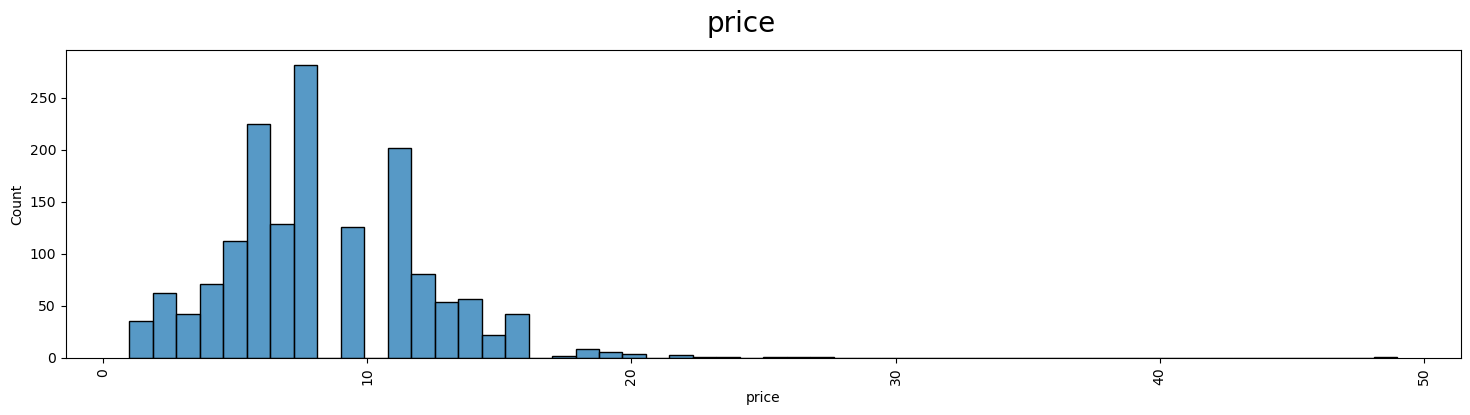

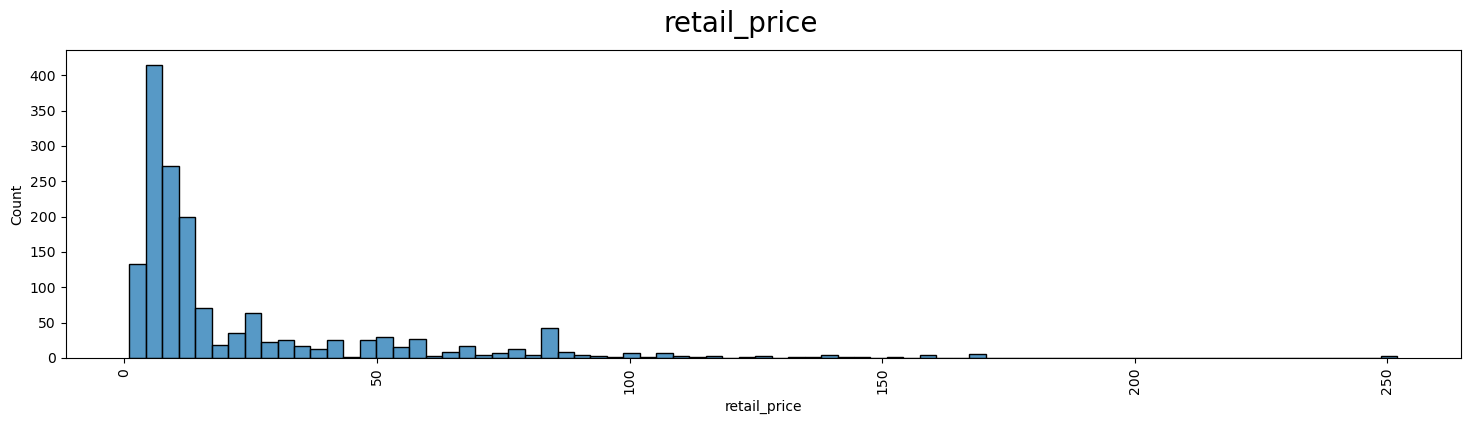

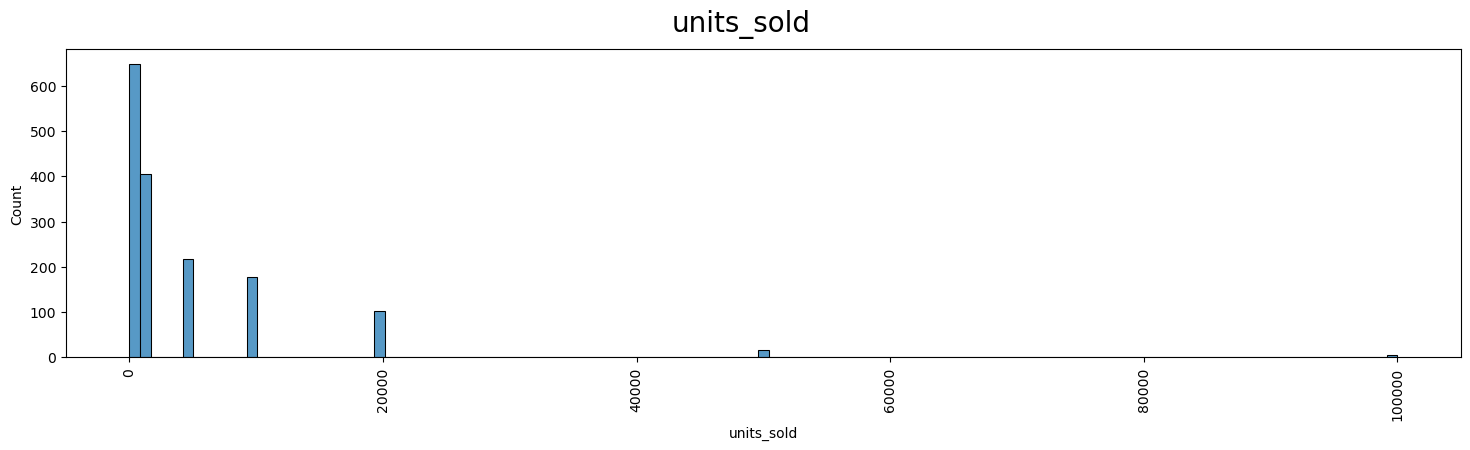

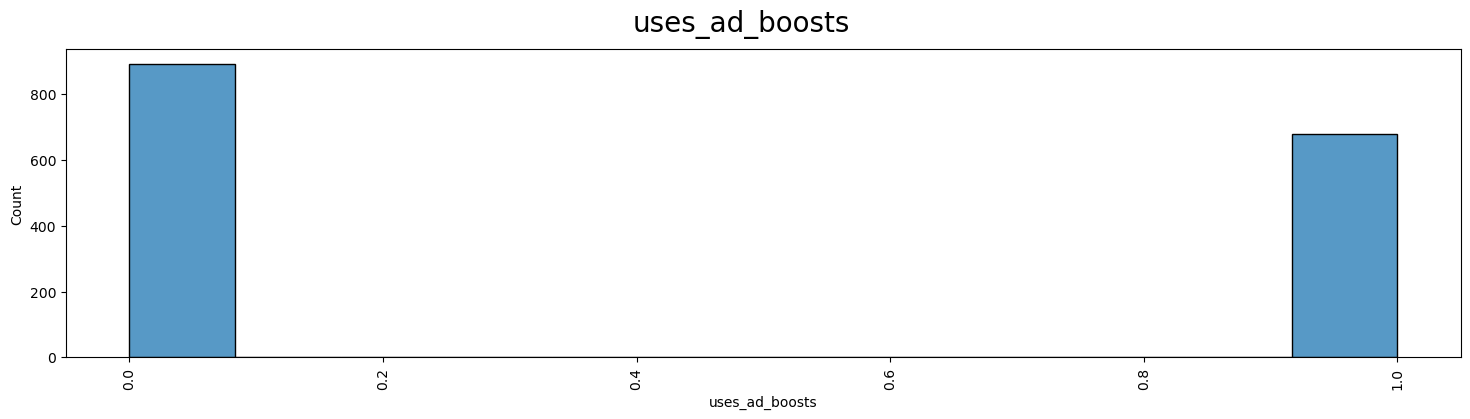

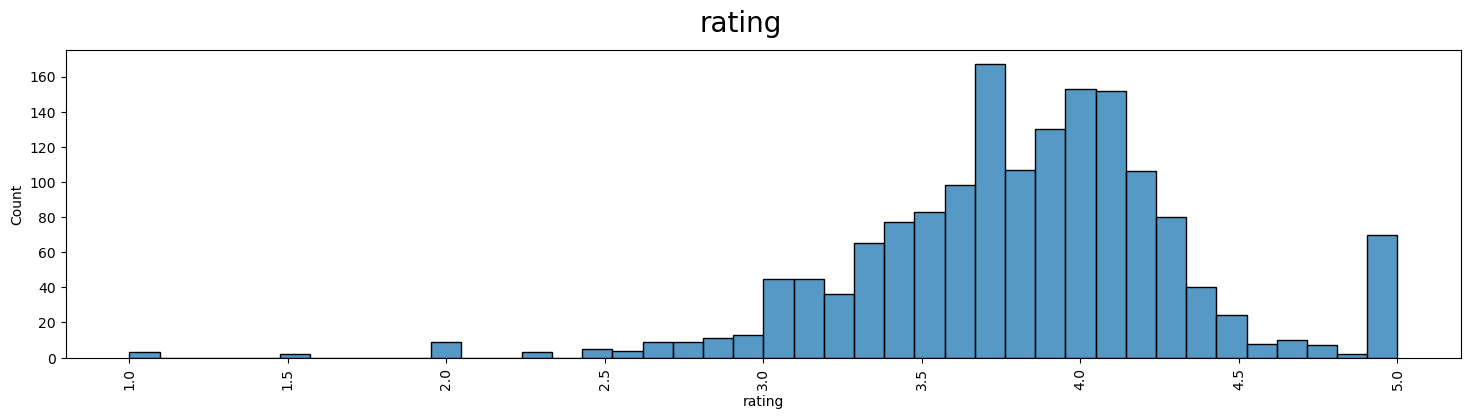

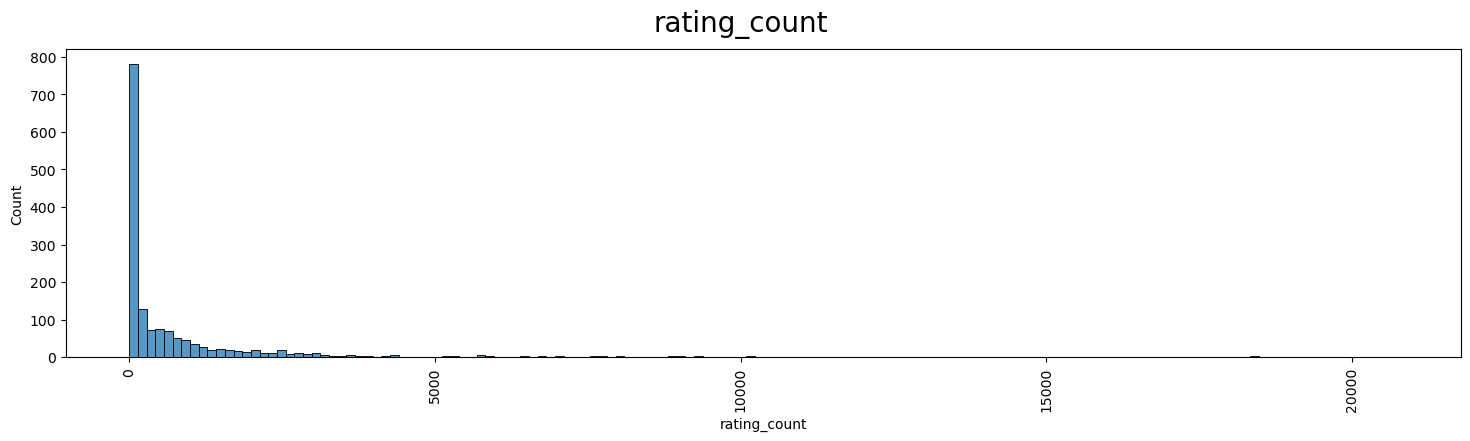

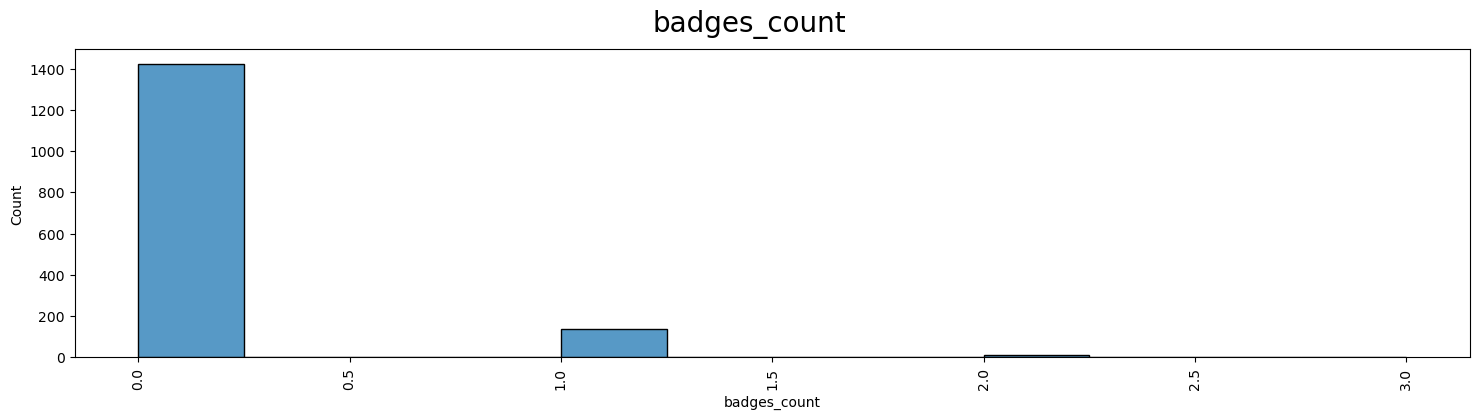

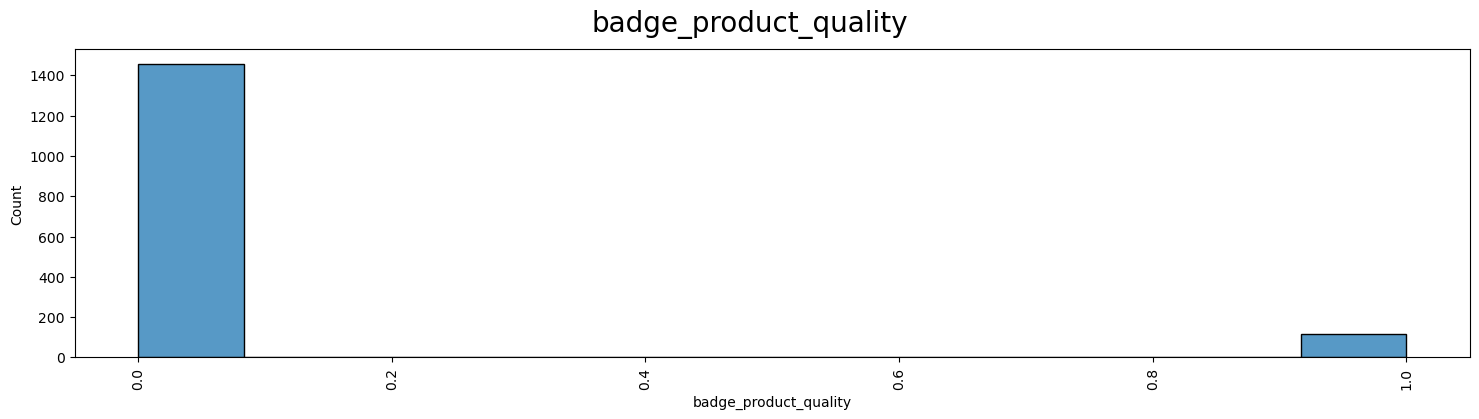

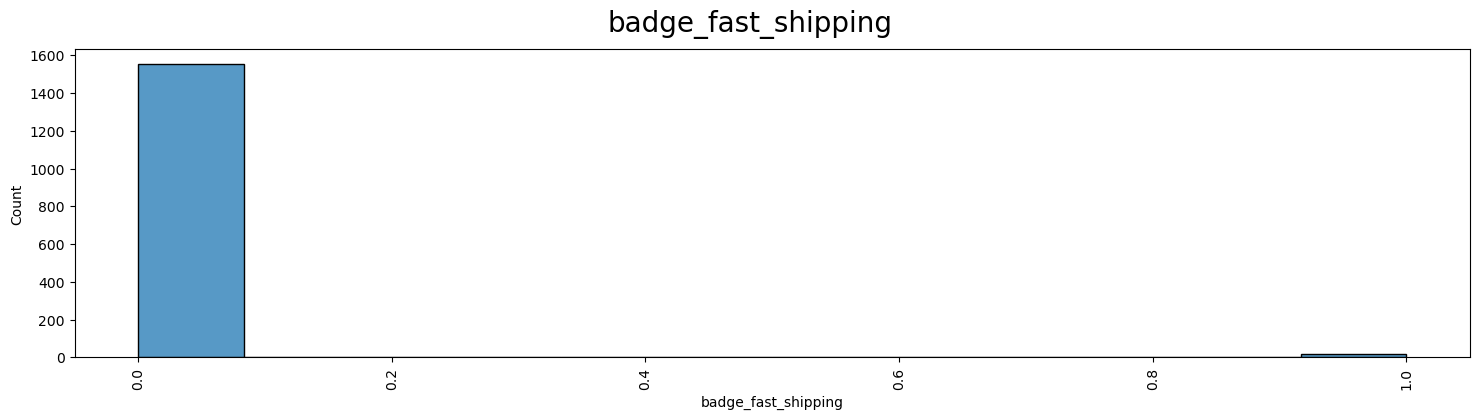

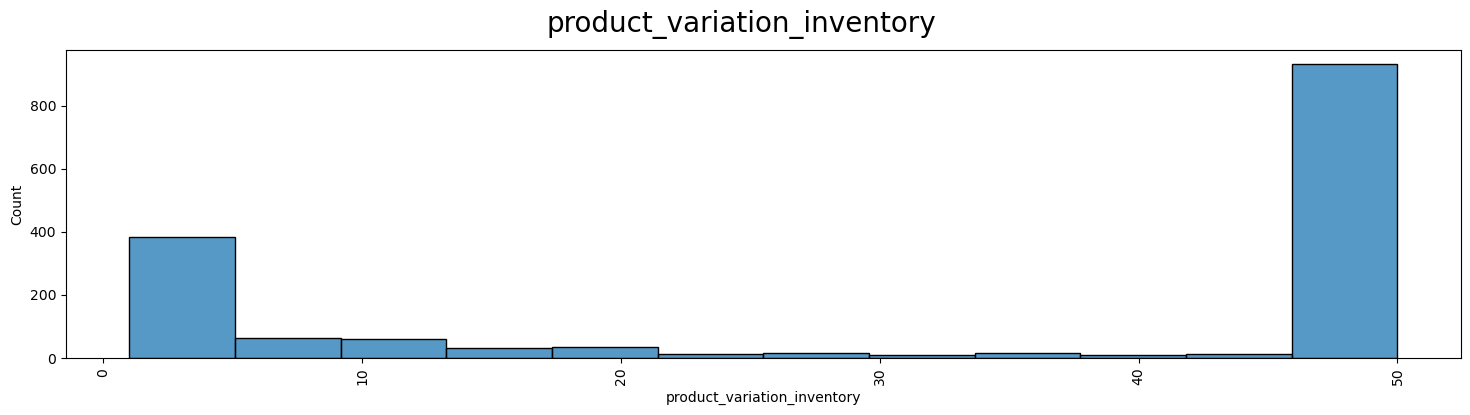

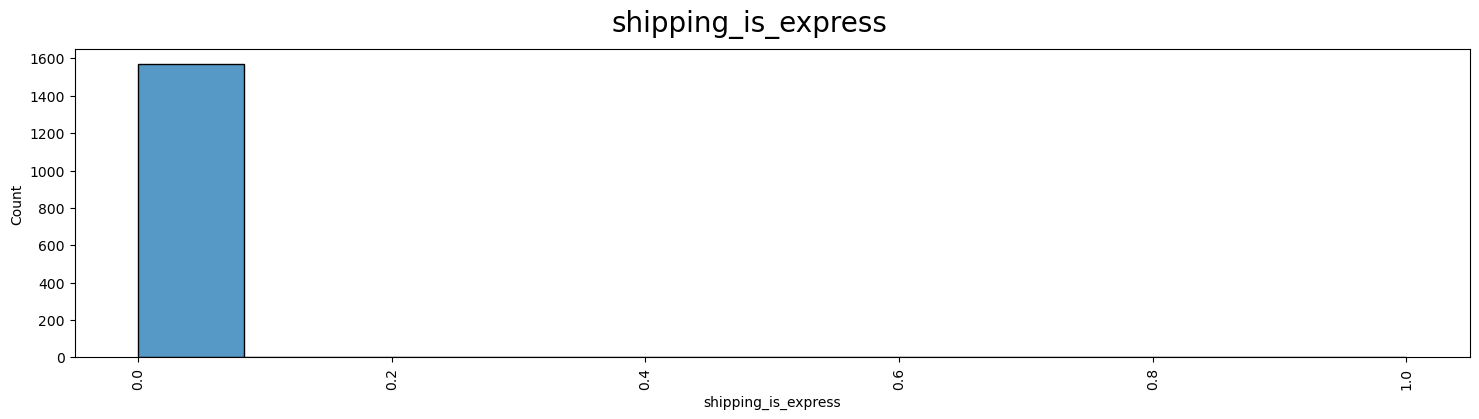

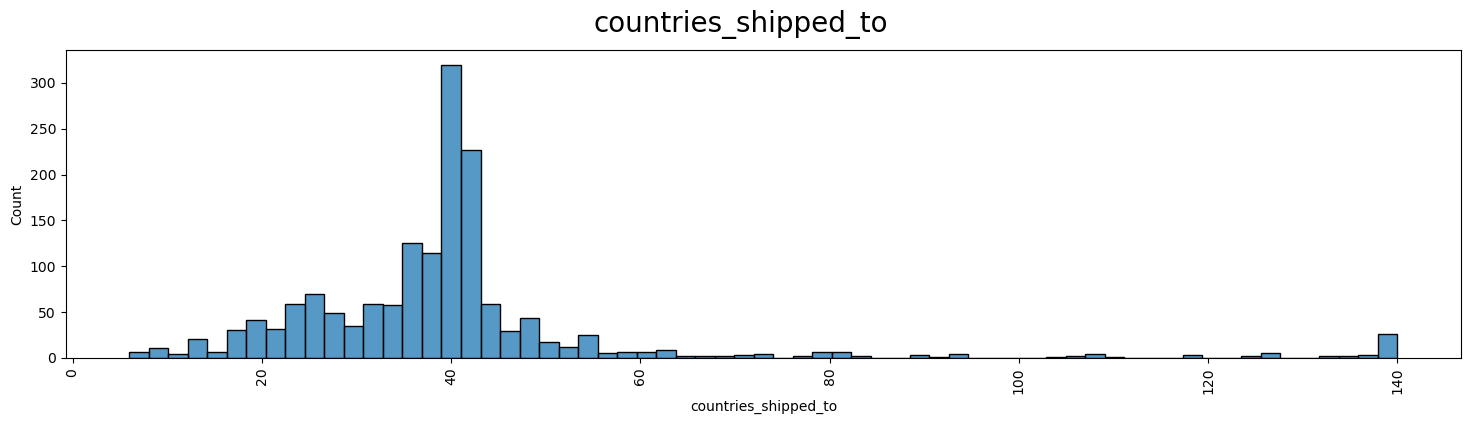

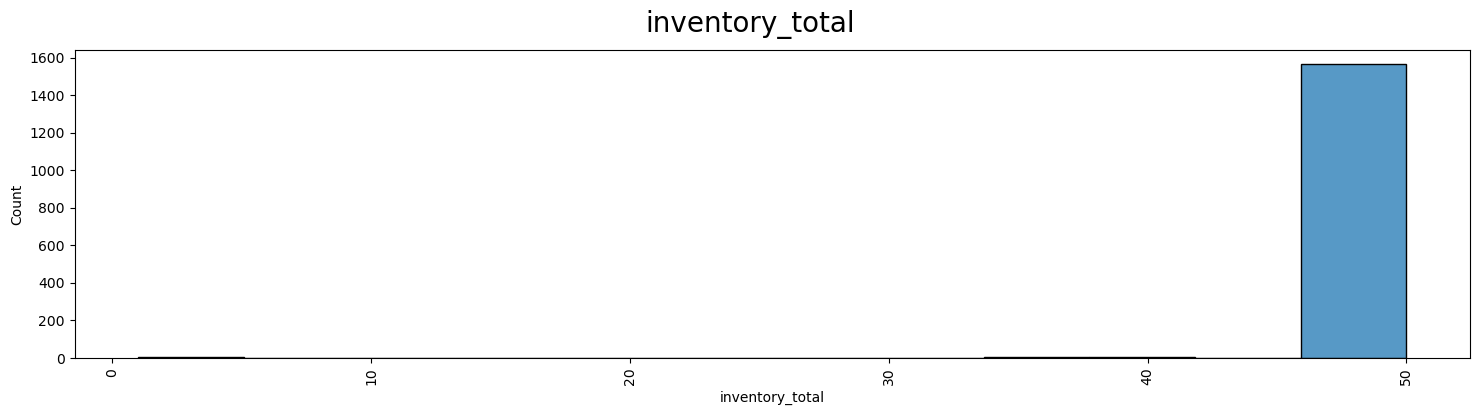

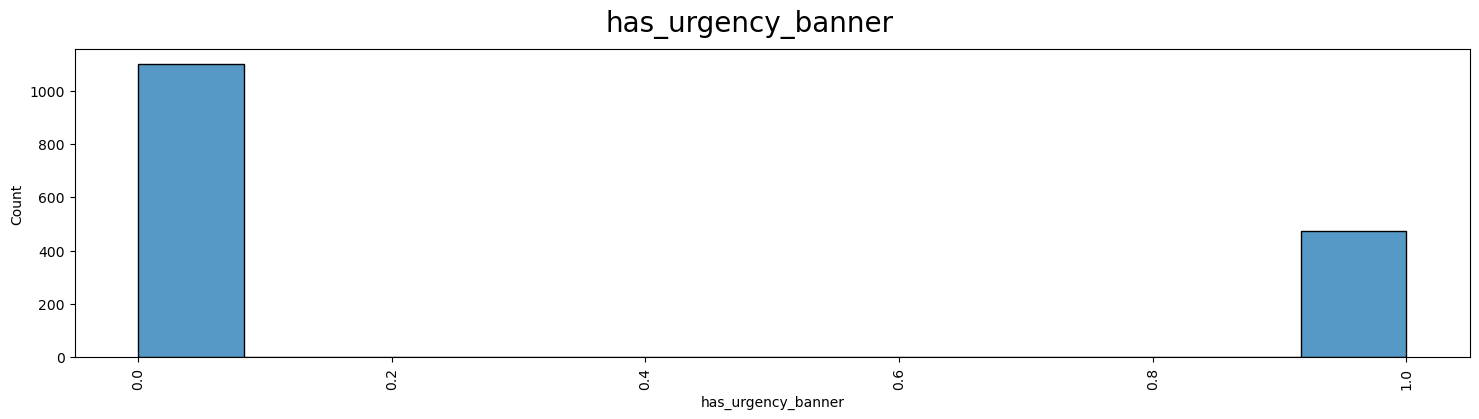

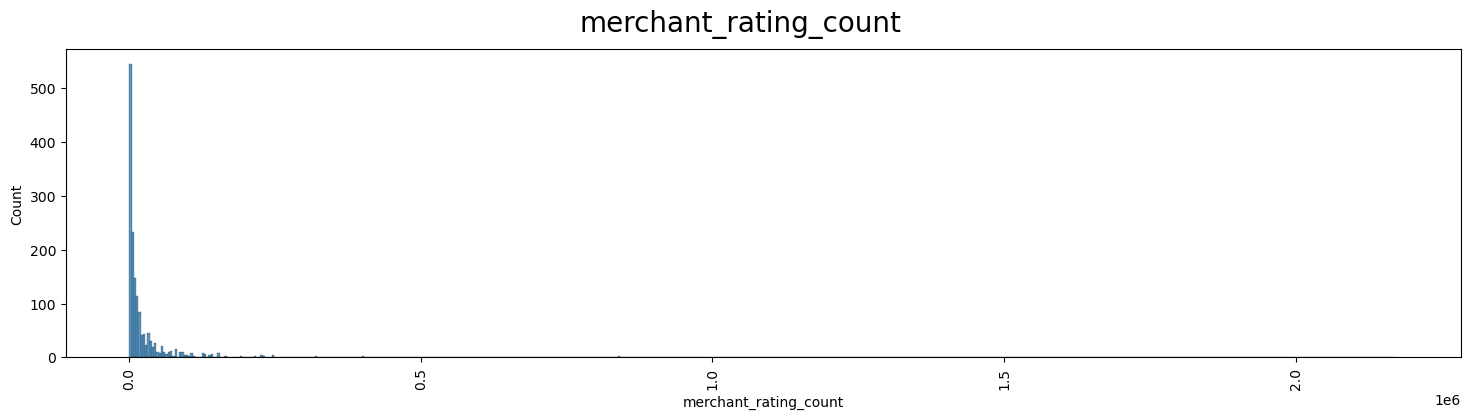

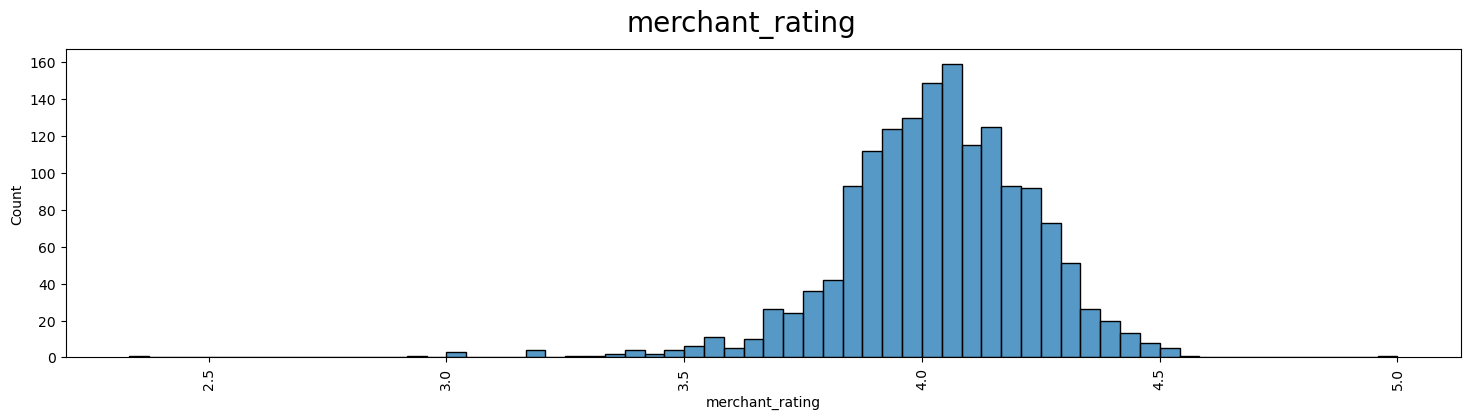

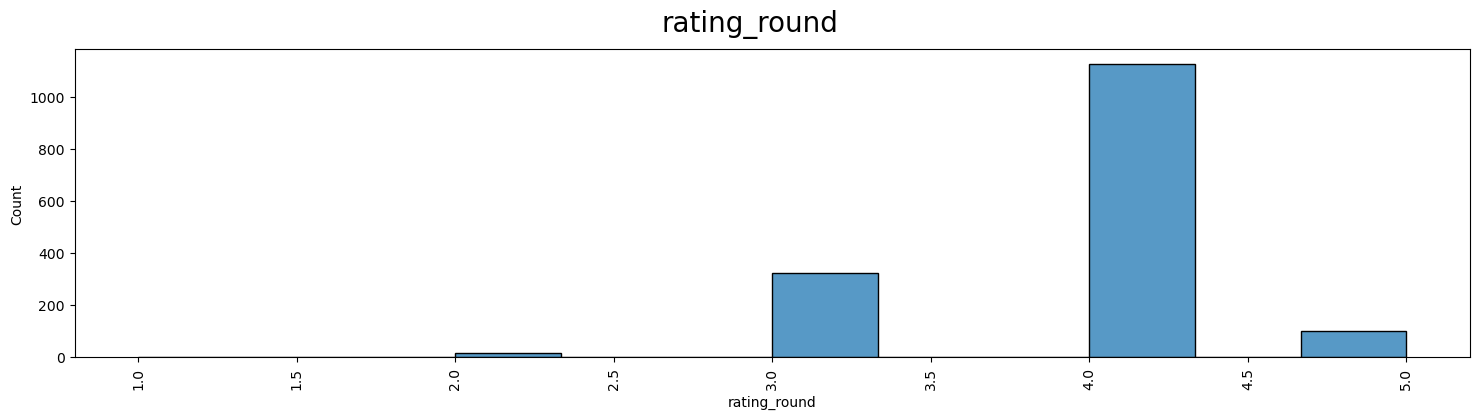

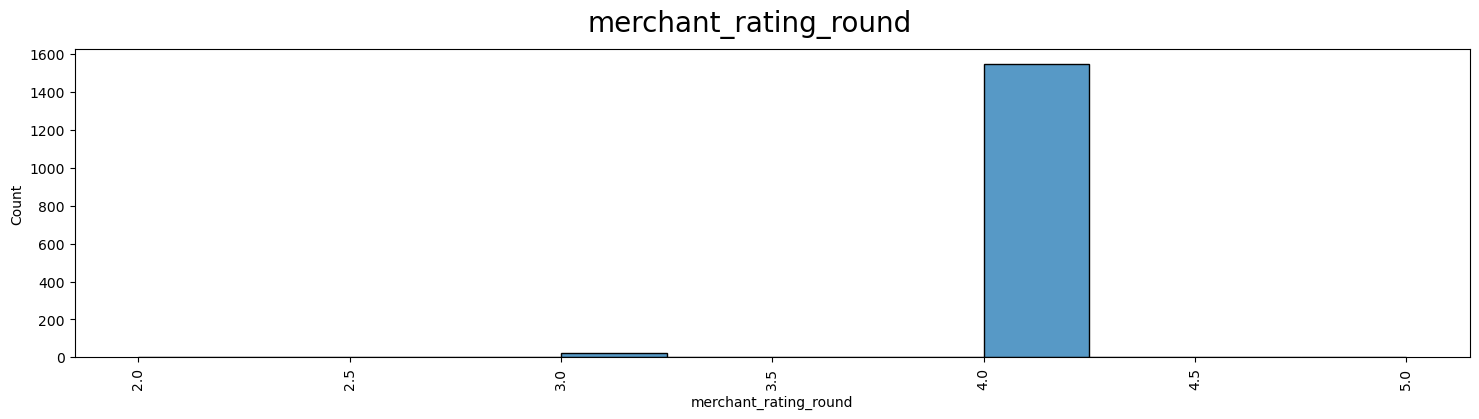

In [41]:
for col in numerical_cols:
    f, axes = plt.subplots(1,1,figsize=(18,4))
    sns.histplot(x=col, data=df_products)
    plt.xticks(rotation=90)
    plt.suptitle(col,fontsize=20)
    plt.show()

In [42]:
df_products.loc[df_products['units_sold'] < 10, 'units_sold']  = 10
df_products['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

In [62]:
df_products['income'] = df_products['price'] * df_products['units_sold']

C:\Users\medson\AppData\Local\Temp\ipykernel_10168\4206081766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products['income'])


<Axes: xlabel='income', ylabel='Density'>

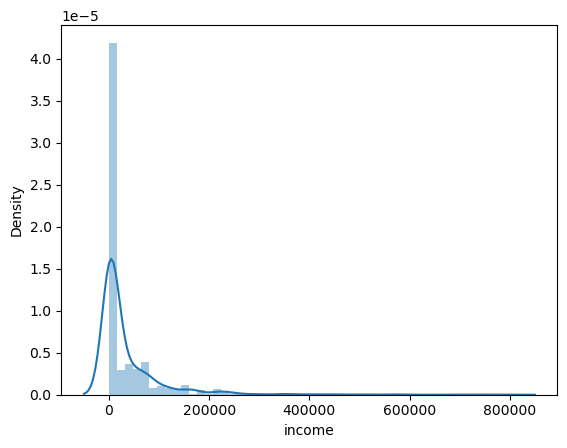

In [52]:
sns.distplot(df_products['income'])

In [63]:
df_products['income'].median()

7000.0

In [54]:
df_products['income'].mean()

35211.941703750796

C:\Users\medson\AppData\Local\Temp\ipykernel_10168\4122380952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products['units_sold'])


<Axes: xlabel='units_sold', ylabel='Density'>

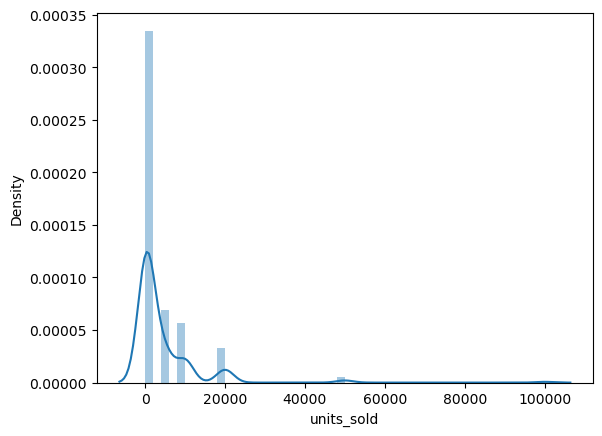

In [50]:
sns.distplot(df_products['units_sold'])

### Ajuste da coluna Tags

In [56]:
from wordcloud import WordCloud, STOPWORDS

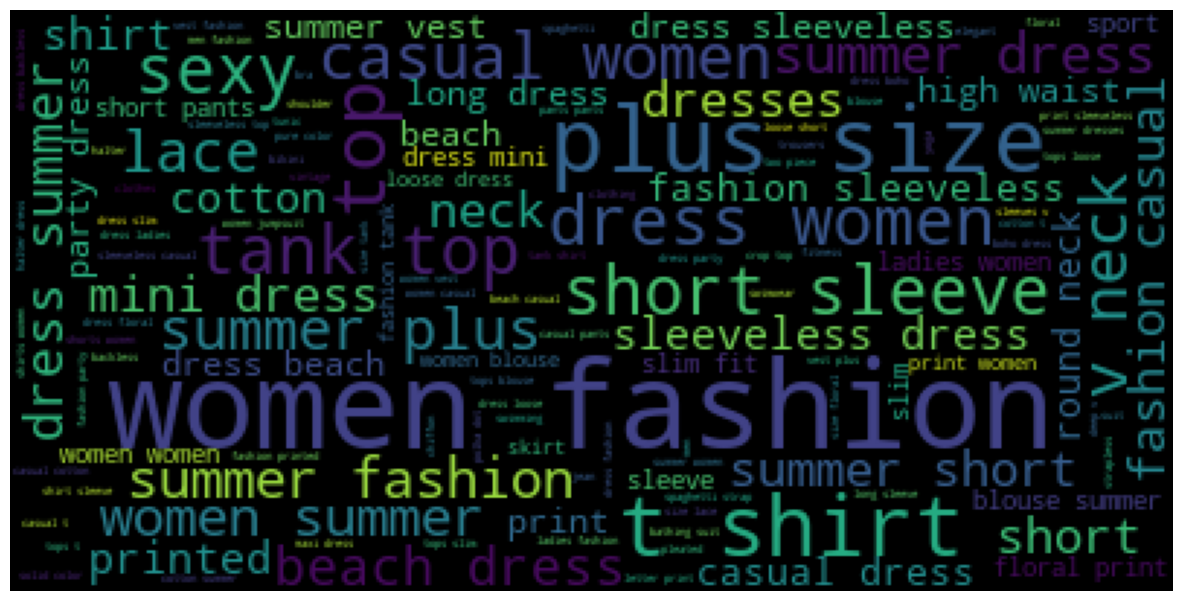

In [58]:

word_string=" ".join(df_products['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)


plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [71]:
df_products['success'] = 0
df_products.loc[df_products["income"] > 7000.0, "success"] = 1

In [72]:
df_products['success'].value_counts()

0    809
1    764
Name: success, dtype: int64

C:\Users\medson\AppData\Local\Temp\ipykernel_10168\311285435.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "discount"], label="1")
C:\Users\medson\AppData\Local\Temp\ipykernel_10168\311285435.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

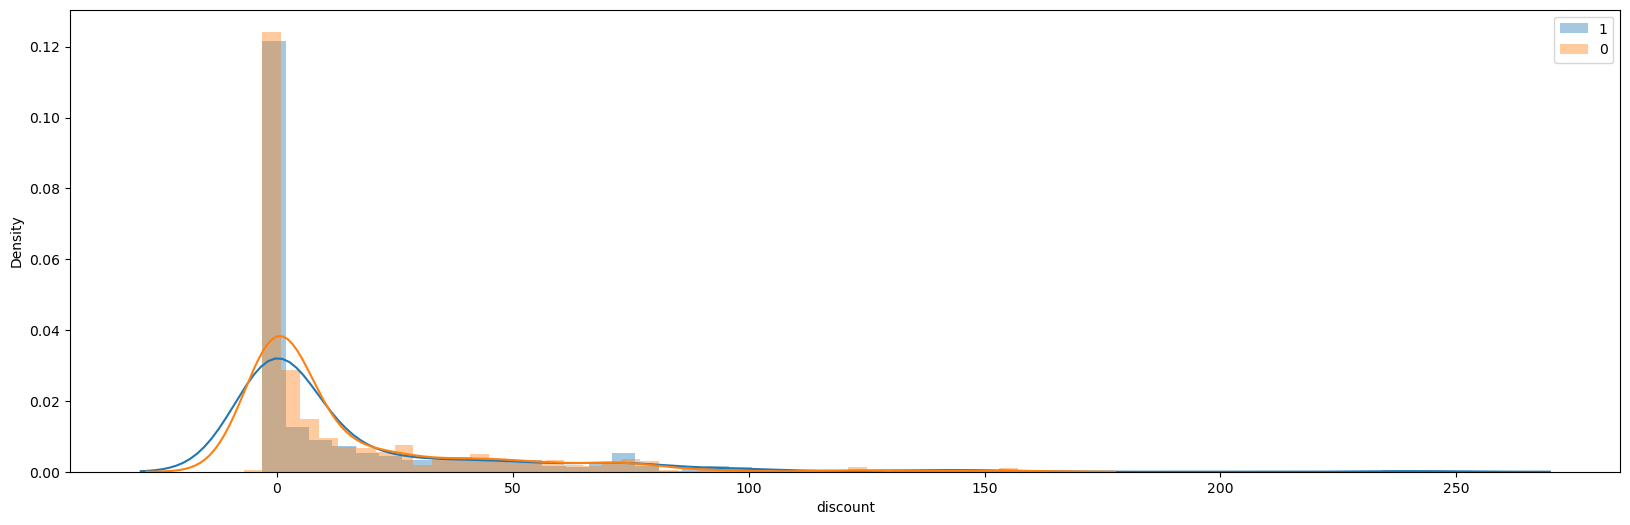

In [73]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(df_products.loc[df_products["success"] == 1, "discount"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "discount"], label="0")
plt.legend()

In [74]:
df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts()

0    441
1    368
Name: uses_ad_boosts, dtype: int64

In [75]:
df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts()

0    451
1    313
Name: uses_ad_boosts, dtype: int64

C:\Users\medson\AppData\Local\Temp\ipykernel_10168\2847145855.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "rating"], label="1", color="blue")
C:\Users\medson\AppData\Local\Temp\ipykernel_10168\2847145855.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

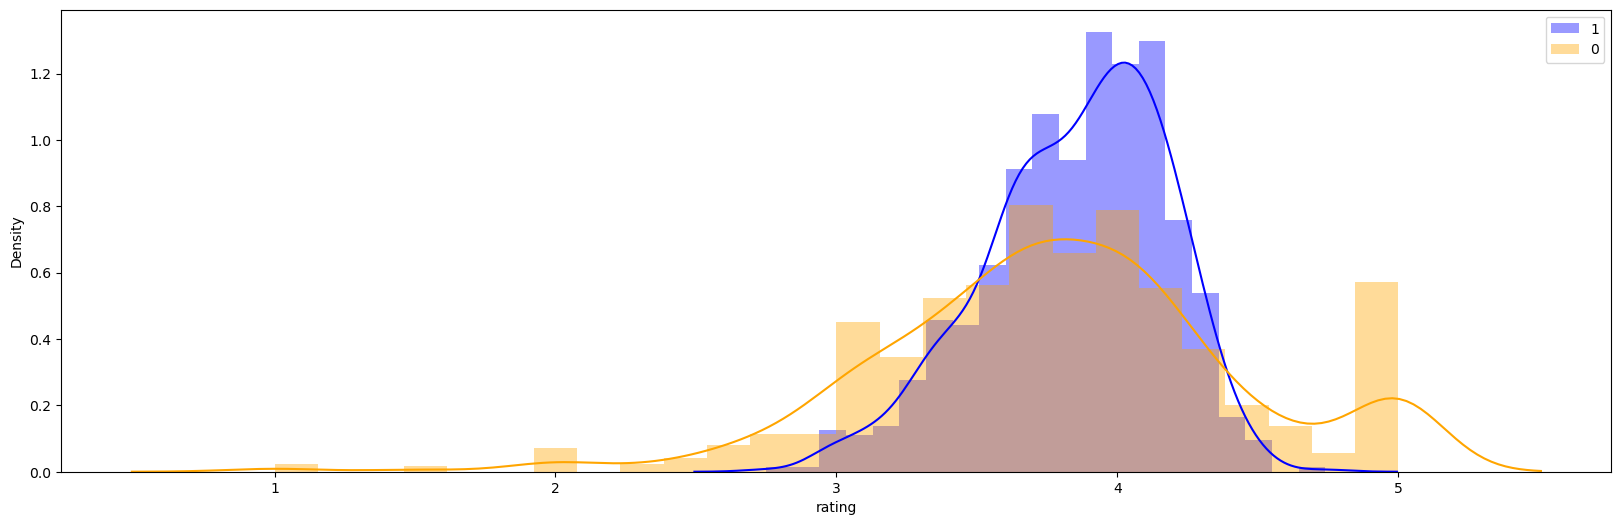

In [76]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(df_products.loc[df_products["success"] == 1, "rating"], label="1", color="blue")
sns.distplot(df_products.loc[df_products["success"] == 0, "rating"], label="0", color="orange")
plt.legend()

In [77]:
df_products.groupby(["success", "badges_count"]).count()[["title"]].pivot_table(index="success", columns="badges_count").fillna(0)

title                
badges_count      0     1    2    3
success                            
0             753.0  48.0  8.0  0.0
1             669.0  90.0  3.0  2.0

In [78]:
df_products.groupby(["success", "badge_product_quality"]).count()[["title"]].pivot_table(index="success", columns="badge_product_quality").fillna(0)

title    
badge_product_quality     0   1
success                        
0                       770  39
1                       686  78

In [79]:
df_products.groupby(["success", "badge_fast_shipping"]).count()[["title"]].pivot_table(index="success", columns="badge_fast_shipping").fillna(0)

title    
badge_fast_shipping     0   1
success                      
0                     795  14
1                     758   6

In [80]:
df_products["tags_count"] = df_products["tags"].apply(lambda x: len(x.split(",")))

C:\Users\medson\AppData\Local\Temp\ipykernel_10168\2680486513.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="1")
C:\Users\medson\AppData\Local\Temp\ipykernel_10168\2680486513.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

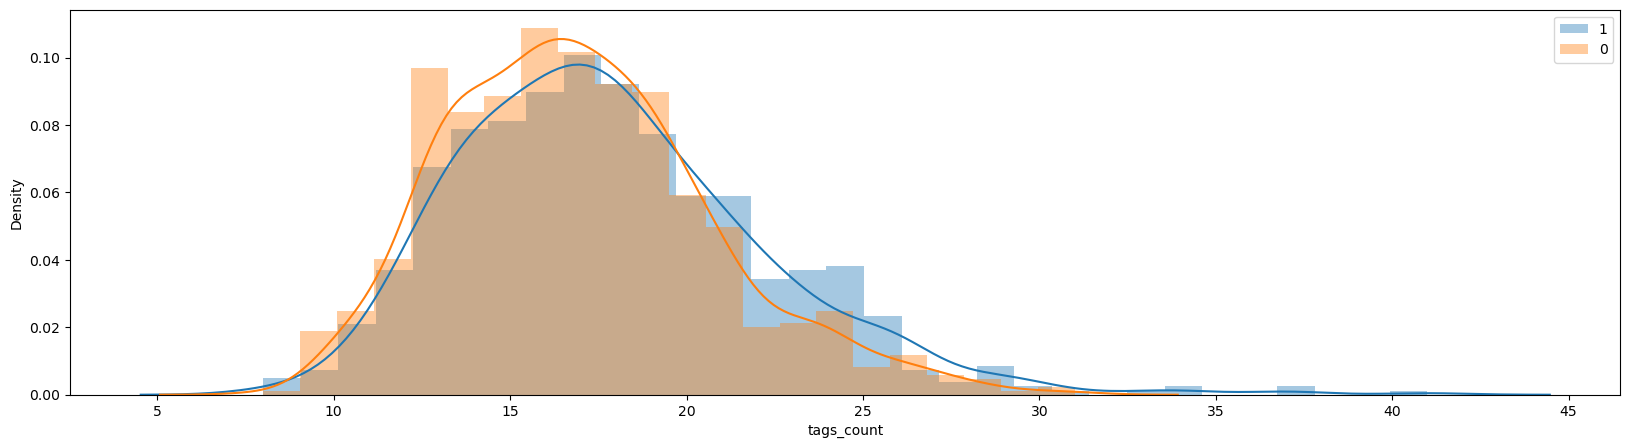

In [81]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 5))
sns.distplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "tags_count"], label="0")
plt.legend()

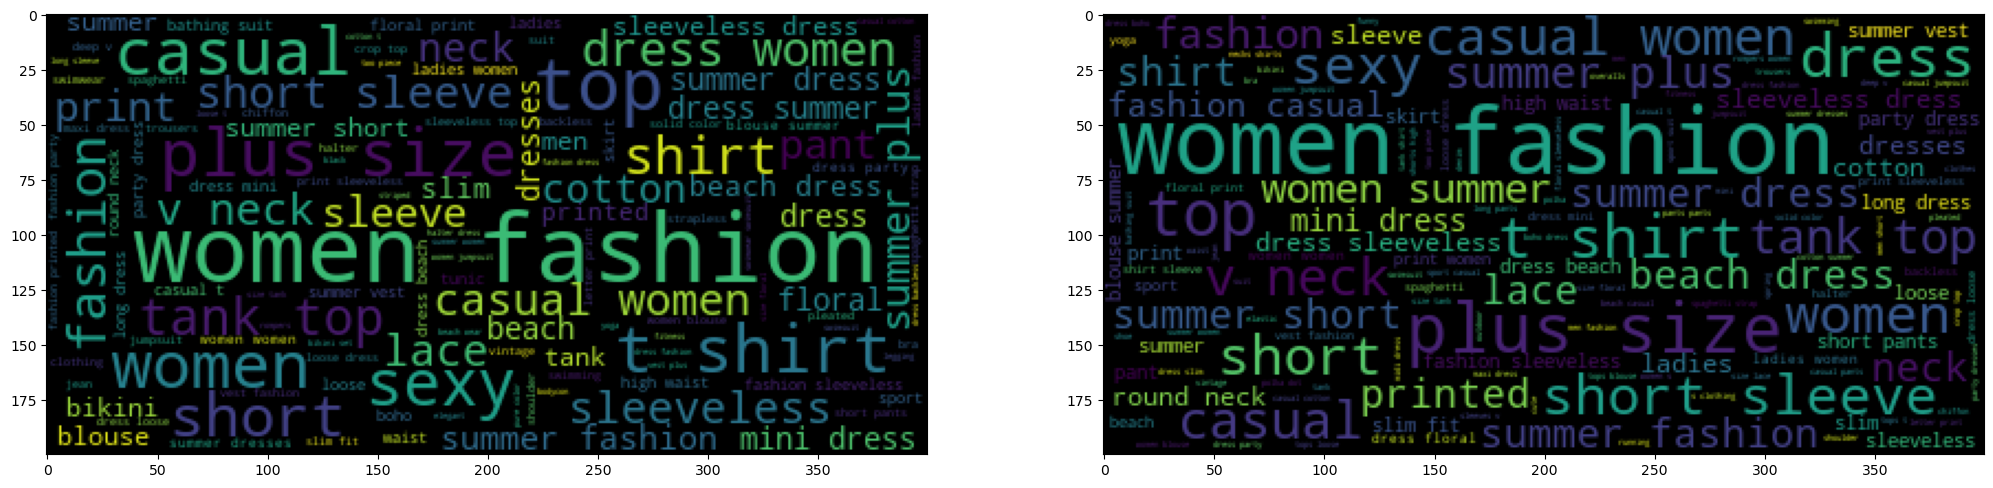

In [82]:
df_success_tags = df_products.loc[df_products["success"] == 1]
word_string=" ".join(df_success_tags['tags'].str.lower())
wordcloud_success = WordCloud(stopwords=STOPWORDS).generate(word_string)

df_fail_tags = df_products.loc[df_products["success"] == 0]
word_string=" ".join(df_fail_tags['tags'].str.lower())
wordcloud_fail = WordCloud(stopwords=STOPWORDS).generate(word_string)

fig, ax = plt.subplots(1, 2, figsize=(25,20))
ax[0].imshow(wordcloud_success)
ax[1].imshow(wordcloud_fail)

plt.show()

## 3. Machine Learning

In [83]:
from sklearn.model_selection import train_test_split

model_cols = ['price', 'retail_price', 
       'uses_ad_boosts', 'rating', 'badges_count',
       'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 
       'merchant_rating', 'discount', 'tags_count']

x = df_products[model_cols]
y = df_products["success"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [85]:
grid_search.best_params_
rf_model = grid_search.best_estimator_

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       242
           1       0.78      0.75      0.76       230

    accuracy                           0.78       472
   macro avg       0.78      0.77      0.77       472
weighted avg       0.78      0.78      0.78       472

[[194  48]
 [ 58 172]]


<Axes: >

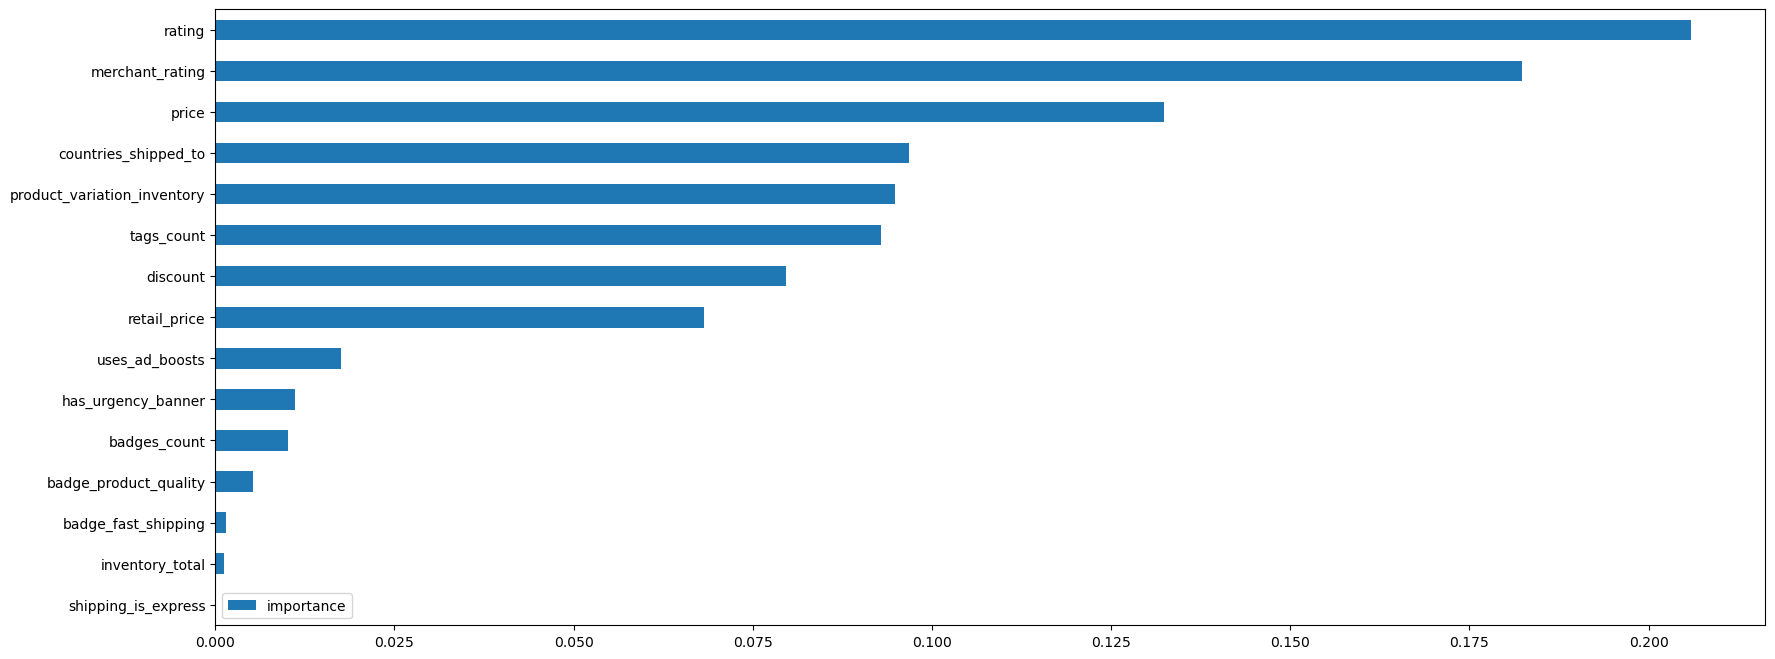

In [87]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)

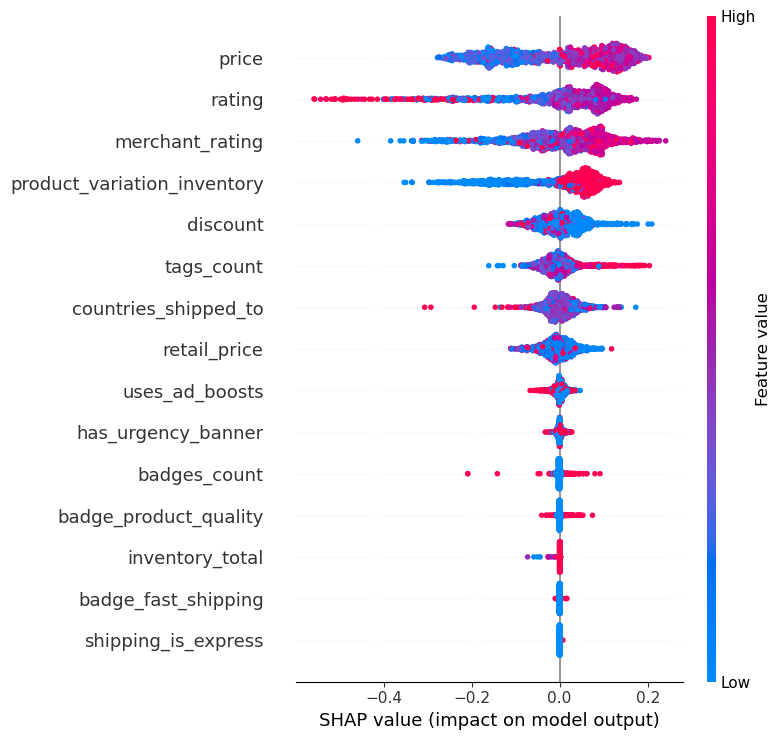

In [88]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values[1], x)

In [ ]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(df_products.loc[df_products["success"] == 1, "discount"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "discount"], label="0")
plt.legend()